<a href="https://colab.research.google.com/github/nicabey/Numerical-Methods/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 1 
Numerical Methods SP-21

Dr. Jacob 

Laxman Bista, Nichole Beyer, Ritu Maharjan, David Evans



First, we have built tools for checking Error.
We have defined four error functions here:
- Absolute Error
- Relative Error
- Approximate Error
- Relative Approximate Error

In [ ]:
def absolute_error(expected_value, actual_value_observed):
    return actual_value_observed - expected_value
def relative_error(expected_value, actual_value_observed):
    return absolute_error(expected_value, actual_value_observed)/actual_value_observed
def approximate_error(previous_value, current_value):
    return current_value - previous_value
def app_relative_error(previous_value, current_value):
    return approximate_error(previous_value, current_value)/current_value

Next we will compute an estimate for $\sin x$ centered at $a = \frac\pi 2$.  The $n$ degree Taylor Expansion will be of the form

$$
f_n(x) = \sum_{i= 0}^n\frac{(-1)^n}{2n!} \left(x-\frac\pi2\right)^{(2n)}
$$

where $\frac{d}{dx}\sin x|_{x = \frac \pi 2} = \frac{(-1)^n}{2n!}$

Thus 

$$
f_n(x) = \sum_{i=0}^n  \frac{\left(-1\right)^{n} }{2 n!}
\left(x-\frac \pi 2\right)^{2n}
$$

Now, we will import a math package doing 'import math' so that we can execute these equations


In [ ]:
import math
pi = math.pi
 

def taylorCoefficient(n):
  return (-1)**(n)/(math.factorial(2*n))

def taylorPolynomialTerms(n, input):
  return taylorCoefficient(n)*((input-pi/2)**(2*n))

def taylorPolynomial (n, input):
  sum = 0
  for i in range(0, n+1):
    sum = sum + taylorPolynomialTerms(i, input)
    return sum
    


The next section of code creates a table to display the values for errors. The package 'plotly' has been used to arrange the values into a table.

In [ ]:

n = [i for i in range(0,21)]
actualValues = [math.sin(pi/2+.1) for i in n]
estimateValues = [taylorPolynomial(x, pi/2 + .1) for x in n]
absError = [absolute_error(estimateValues[i], actualValues[i]) for i in n]
relError = [relative_error(estimateValues[i], actualValues[i]) for i in n]
apxError = [approximate_error(estimateValues[i], estimateValues[i+1]) for i in range (0,19)]
relApxError = [app_relative_error(estimateValues[i], estimateValues[i+1]) for i in range (0,19)]


In [ ]:

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
                header=dict(values=['Degree', 'Actual Value', 'Estimated Value','Absolute Error','Relative Error','Approximate Error','Relative Approximate Error']),
                 cells=dict(values = [n,actualValues,estimateValues,absError,relError,apxError,relApxError]))
                     ])
fig.show()


From our table we see that from the beginning the approximate error and relative approximate error is zero, this seems like a pretty good approximation.  

Now we will graph the function and the 5th order approximation. 

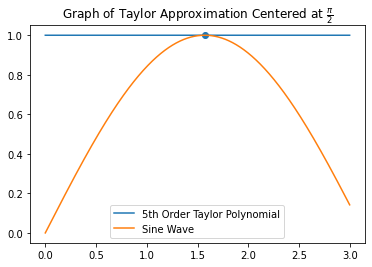

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(np.pi/2,1
            )
plt.plot(x, taylorPolynomial (5,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{2}$')
plt.legend(['5th Order Taylor Polynomial', 'Sine Wave'])

plt.show()


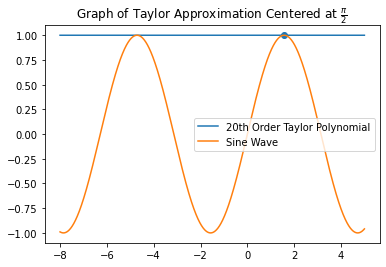

In [ ]:
import math
pi = math.pi
x = np.arange( -8,5,.001)
plt.scatter(pi/2,1)
plt.plot(x,taylorPolynomial(20,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{2}$')
plt.legend(['20th Order Taylor Polynomial', 'Sine Wave'])

plt.show()

We are unable to see from our table and graphs a the best place to stop the approximations, this tells us that it is necessary to extend our polynomial to the 20th dregree. Extending the function this far gives us a more accurate approximation. 